In this homework, you need to solve two tasks. For problems with theoretical calculations, you need to show a sufficient number of intermediate steps to explain how you have obtained the result. 
* Formulas are expected in Latex style inside the notebook. The assignment should be uploaded in Jupyter Notebook format(`.ipynb`).

# Task 1. Martian weather. (20 points)

In this task you need to estimate parameters and their confidence intervals for a given sample. As data, you will explore martian weather. For more visualizations take a look [here](https://pudding.cool/2018/01/mars-weather/).

First of all, you need some libraries. Also, fix random seed to get reproducable results.

In [1]:
import numpy as np
from numpy.random import choice, seed
import pandas as pd
from scipy.stats import sem, norm, skew, chi2
import matplotlib.pyplot as plt

seed(366)

In [2]:
import matplotlib as mp
import matplotlib.font_manager

titlesize = 20
labelsize = 16
legendsize = labelsize
xticksize = 14
yticksize = xticksize

mp.rcParams['legend.markerscale'] = 1.5     # the relative size of legend markers vs. original
mp.rcParams['legend.handletextpad'] = 0.5
mp.rcParams['legend.labelspacing'] = 0.4    # the vertical space between the legend entries in fraction of fontsize
mp.rcParams['legend.borderpad'] = 0.5       # border whitespace in fontsize units
mp.rcParams['font.size'] = 12
mp.rcParams['font.family'] = 'serif'
mp.rcParams['font.serif'] = 'Times New Roman'
mp.rcParams['axes.labelsize'] = labelsize
mp.rcParams['axes.titlesize'] = titlesize
mp.rcParams['axes.unicode_minus'] = False

mp.rc('xtick', labelsize=xticksize)
mp.rc('ytick', labelsize=yticksize)
mp.rc('legend', fontsize=legendsize)
mp.rc('font', **{'family':'serif'})

## Part 1. Load data (1 point)

You need to load data from `mars-weather.csv`, take feature for your variant, remove absent values (`Nan`s) and convert sample to `int` type. 

### a) 

`feature_name = "min_temp"`

### b)

`feature_name = "max_temp"`

In [3]:
# Your code here
feature_name = "max_temp"
df = pd.read_csv("mars-weather.csv")[feature_name]
sample_full = df.dropna().values.astype(np.int64)

sample_full.shape

(1867,)

Let's take a quarter of martian year ~ 168 sols(martian days). Sample them randomly from full sample using function `choice`(from `numpy.random`) with parameter `replace=False`.

In [4]:
# Your code here

N = 168
sample_part = np.random.choice(sample_full, size=N, replace=False)
sample_part

array([ -2, -28, -27, -18,  -4, -29, -26, -23,   3,  -2,   1,  -8,  -1,
        -5,  -1, -27,  -1,  -3,  -5, -15,  -9,   0,  -6,  -6,  -1,   7,
       -22, -12, -28, -32,  -1, -28,   1, -15, -16, -27, -30, -11, -26,
       -24, -29,  -8, -29, -30, -12,  -5,   1,  -6, -17, -23,  -3, -24,
        -5, -20, -29,  -8, -11,  -4,  -1, -27, -22,  -2,  -2, -15, -18,
        -4,  -6,   7,   4, -28, -20, -30, -29,  -9,   3, -31,  -3,  -2,
       -26,  -3, -30,  -2,  -3, -20, -29, -29,   2,  -3,  -1, -11,  -3,
        -6, -25, -13, -23, -26,   0,  -6, -28,   0,  -8,  -6,  -8,  -4,
         3, -26,   0,   2,   0, -24,   6, -25, -19,  -4, -21, -20,   0,
        -3,  -1, -14, -22, -24, -27, -23, -24,  -6, -21,   7,   0,  -2,
        -4, -12, -14, -15,  -5,  -6, -25,   1, -12, -12, -28, -11, -21,
       -26, -28, -22, -16,  -1,  -7,  -6,  -6,  -3, -19, -22, -13,   0,
       -22, -11, -11, -18, -30, -26, -25, -25,   0, -12, -27,  -6])

Plot values frequences for full and partial sample using bar plot.

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

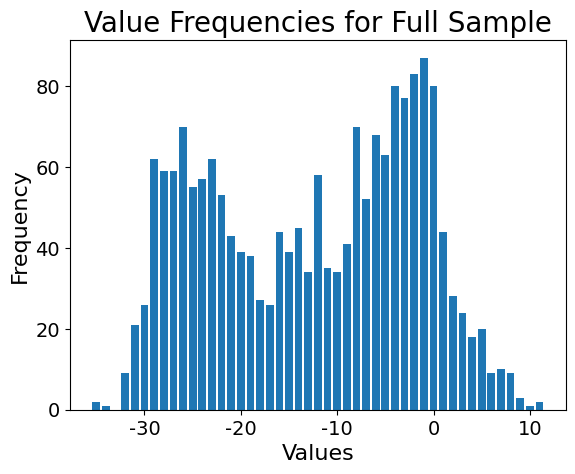

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

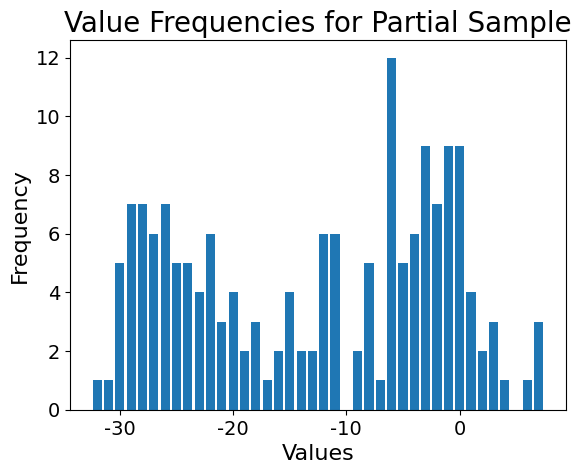

In [5]:
# Count the occurrences of each value in the full sample
values_full, counts_full = np.unique(sample_full, return_counts=True)

# Now count the occurrences of each value in the partial sample
values_part, counts_part = np.unique(sample_part, return_counts=True)

# Function to plot the frequencies
def plot_frequencies(values, counts, title):
    fig, ax = plt.subplots()
    ax.bar(values, counts)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_title(title)
    plt.show()

# Code to plot the frequencies for the full sample
plot_frequencies(values_full, counts_full, 'Value Frequencies for Full Sample')

# Code to plot the frequencies for the partial sample
plot_frequencies(values_part, counts_part, 'Value Frequencies for Partial Sample')

## Part 2. Parameter estimation. (6 points)
Find the following parameters' estimates and their 95% confidence intervals (except for `mode` and `skewness`). You need to show theoretical calculations for estimates and intervals (with intermediate steps) and then make simulation.

### a) Mean and CI

$$ \hat{mean} = \frac{1}{n} \sum_{i=1}^{n} x_n$$

$$ CI(\hat{mean}) = \hat{mean} \pm  t_{\frac{\alpha}{2}, n-1} \cdot \left( \frac{s}{\sqrt{n}} \right)$$

In [6]:
# Your code here
from scipy import stats     
def mean_parameter_estimation(samples, alpha=0.05):
    mean = np.mean(samples)
    
    standard_error = np.var(samples) / np.sqrt(len(samples))
    t_score = stats.t.ppf(1 - alpha / 2, len(samples) - 1)
    
    return mean, mean - t_score * standard_error, mean + t_score * standard_error

mean, lower, upper = mean_parameter_estimation(sample_part)
f"Mean {mean:.3f} with confidence interval ({lower:.3f}, {upper:.3f})"

'Mean -12.792 with confidence interval (-31.541, 5.958)'

### b) Median and CI

Here you can assume that PDF is continuous at the median point and provide a normal-based interval.


- If  n  is odd:

  $$\hat{median} = x_{\left(\frac{n+1}{2}\right)}$$

- If n is even:

  $$\hat{median} = \frac{x_{\left(\frac{n}{2}\right)} + x_{\left(\frac{n}{2} + 1\right)}}{2}$$


$$ CI(\hat{median}) = \hat{median} \pm z_{\frac{\alpha}{2}} \cdot \left( \frac{s}{\sqrt{n}} \cdot \sqrt{\frac{\pi}{2}} \right)$$

In [7]:
# Your code here
def median_parameter_estimation(samples, alpha=0.05):
    median = np.median(samples)
    std = np.std(samples, ddof=1)
    se_median = (std / np.sqrt(len(samples))) * np.sqrt(np.pi / 2)
    z_score = norm.ppf(1 - alpha / 2)
    
    return median, median - z_score * se_median, median + z_score * se_median

median, lower, upper = median_parameter_estimation(sample_part)
f"Median {median:.3f} with normal-based confidence interval ({lower:.3f}, {upper:.3f})"

'Median -11.000 with normal-based confidence interval (-13.109, -8.891)'

### c) Variance and CI

Here you can assume that the sample comes from a nornal distribution, but the mean and variance are not known.


$$ \hat{Variance} = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2$$

$$ CI(\hat{Variance}) = \left( \frac{(n-1) \cdot \hat{Variance}}{\chi^2_{\alpha/2, n-1}}, \frac{(n-1) \cdot \hat{Variance}}{\chi^2_{1-\alpha/2, n-1}} \right)$$

In [8]:
# Your code here

def var_parameter_estimation(samples, alpha=0.05):
    variance_sample = np.var(samples, ddof=1)
    n = len(samples)
    
    chi2_lower = chi2.ppf(alpha / 2, n - 1)
    chi2_upper = chi2.ppf(1 - alpha / 2, n - 1)
    
    ci_variance_lower = ((n-1) * variance_sample) / chi2_upper
    ci_variance_upper = ((n-1) * variance_sample) / chi2_lower
    return variance_sample, ci_variance_lower, ci_variance_upper
    

var, lower, upper = var_parameter_estimation(sample_part)
f"Variance {var:.3f} with confidence interval ({lower:.3f}, {upper:.3f})"

'Variance 123.831 with confidence interval (101.037, 155.357)'

### d) Mode (most frequent value in a sample)

In [9]:
# Your code here

mode_data = stats.mode(sample_part, keepdims=False)
mode_ = mode_data.mode
f"Mode: {mode_}"

'Mode: -6'

### e) Skewness

In [10]:
# Your code here
from scipy.stats import skew

skewness = skew(sample_part)
f"Skewness: {skewness:e}"

'Skewness: -1.323128e-01'

## Part 3. Bootstrap (4 points)

Find confidence intervals for following estimates using bootsrap. Use function `choice` with parameter `replace=True` for bootstrap sampling. Try different numbers of generated samples.

### a) Mean and CI

In [11]:
# Your code here
# Number of bootstrap samples
def bookstrap_estimation(samples, num_bootstrap_samples, stat_func):

    # Bootstrap resampling
    bootstrap_means = np.array([
        stat_func(np.random.choice(samples, replace=True, size=len(samples)))
        for _ in range(num_bootstrap_samples)
    ])

    confidence_level = 0.95
    lower_percentile = (1 - confidence_level) / 2
    upper_percentile = 1 - lower_percentile
    ci_lower = np.percentile(bootstrap_means, lower_percentile * 100)
    ci_upper = np.percentile(bootstrap_means, upper_percentile * 100)

    return np.mean(bootstrap_means), ci_lower, ci_upper

mean, lower, upper = bookstrap_estimation(sample_part, 10000, np.mean)
print(f"Mean {mean:.3f} with confident interval ({lower:.3f}, {upper:.3f})")

mean, lower, upper = bookstrap_estimation(sample_part, 20000, np.mean)
print(f"Mean {mean:.3f} with confident interval ({lower:.3f}, {upper:.3f})")

mean, lower, upper = bookstrap_estimation(sample_part, 30000, np.mean)
print(f"Mean {mean:.3f} with confident interval ({lower:.3f}, {upper:.3f})")

Mean -12.802 with confident interval (-14.494, -11.155)
Mean -12.790 with confident interval (-14.482, -11.095)
Mean -12.793 with confident interval (-14.458, -11.125)


### b) Median and CI

In [12]:
# Your code here
# Your code here
# Number of bootstrap samples

median, lower, upper = bookstrap_estimation(sample_part, 10000, np.median)
print(f"Median {median:.3f} with normal-based confident interval ({lower:.3f}, {upper:.3f})")

median, lower, upper = bookstrap_estimation(sample_part, 20000, np.median)
print(f"Median {median:.3f} with normal-based confident interval ({lower:.3f}, {upper:.3f})")

median, lower, upper = bookstrap_estimation(sample_part, 30000, np.median)
print(f"Median {median:.3f} with normal-based confident interval ({lower:.3f}, {upper:.3f})")

Median -11.102 with normal-based confident interval (-15.000, -7.000)
Median -11.103 with normal-based confident interval (-15.000, -6.500)
Median -11.092 with normal-based confident interval (-15.000, -7.000)


### c) Variance and CI

In [13]:
# Your code here

var, lower, upper = bookstrap_estimation(sample_part, 10000, np.var)
print(f"Variance {var:.3f} with confident interval ({lower:.3f}, {upper:.3f})")

var, lower, upper = bookstrap_estimation(sample_part, 20000, np.var)
print(f"Variance {var:.3f} with confident interval ({lower:.3f}, {upper:.3f})")

var, lower, upper = bookstrap_estimation(sample_part, 30000, np.var)
print(f"Variance {var:.3f} with confident interval ({lower:.3f}, {upper:.3f})")

Variance 122.357 with confident interval (107.511, 136.999)
Variance 122.324 with confident interval (108.110, 136.903)
Variance 122.391 with confident interval (108.115, 137.073)


## Part 4. Comparison with true values. (1 point)

Compare with estimates calculated over full sample. Write small conclusion about estimates and their confidence intervals obtained without and with bootstrap. Also, you can share some conclusions about martian weather :)

In [14]:
# Your code here
from scipy.stats import mode


mode_data = stats.mode(sample_part, keepdims=False)
mode_ = mode_data.mode
f"Mode: {mode_}"

skewness = skew(sample_full)
f"Skewness: {skewness:e}"

alpha = 0.05
# without bootstrap
mean_full, mean_lower_full, mean_upper_full = mean_parameter_estimation(sample_full, alpha)
median_full, median_lower_full, median_upper_full = median_parameter_estimation(sample_full, alpha)
var_full, var_lower_full, var_upper_full = var_parameter_estimation(sample_full, alpha)

print("Without bookstrap")
print(f"Mean {mean_full:.3f} with ci ({mean_lower_full:.3f}, {mean_upper_full:.3f}),\n"
      f"Median {median_full:.3f} with ci ({median_lower_full:.3f}, {median_upper_full:.3f}),\n"
      f"Var {var_full:.3f} with ci ({var_lower_full:.3f}, {var_upper_full:.3f}),\n"
      f"Moda {mode_},\n"
      f"Skewness {skewness} \n\n")

# with bookstrap
n_bootstrap_sample = 2000
mean_full_b, mean_lower_full_b, mean_upper_full_b = bookstrap_estimation(sample_full, n_bootstrap_sample, np.mean)
median_full_b, median_lower_full_b, median_upper_full_b =  bookstrap_estimation(sample_full, n_bootstrap_sample, np.median)
var_full_b, var_lower_full_b, var_upper_full_b =  bookstrap_estimation(sample_full, n_bootstrap_sample, np.var)

print("With bookstrap")
print(f"Mean {mean_full_b:.3f} with ci ({mean_lower_full_b:.3f}, {mean_upper_full_b:.3f}),\n"
      f"Median {median_full_b:.3f} with ci ({median_lower_full_b:.3f}, {median_upper_full_b:.3f}),\n"
      f"Var {var_full_b:.3f} with ci ({var_lower_full_b:.3f}, {var_upper_full_b:.3f}),\n"
      f"Moda {mode_},\n"
      f"Skewness {skewness}")


# mean = ...
# median = ...
# var = ...
# moda = ...
# skewness = ...

Without bookstrap
Mean -12.510 with ci (-17.704, -7.317),
Median -11.000 with ci (-11.608, -10.392),
Var 114.478 with ci (107.474, 122.194),
Moda -6,
Skewness -0.12260847600707941 


With bookstrap
Mean -12.514 with ci (-12.999, -12.013),
Median -11.330 with ci (-12.000, -10.000),
Var 114.407 with ci (109.917, 119.097),
Moda -6,
Skewness -0.12260847600707941


## Part 5. Confidence intervals and sample size. (8 points)

Compare size of confidence intervals **for the mean** obtained without and with bootstrap. Additionally, compare an empirical coverage of different confidence intervals (by generating sufficient number of samples of corresponding size and calculating proportion of cases when the interval covers the mean of the full sample). Consider sizes `[42, 84, 168, 335, 670, 1340]`. Plot results and make conclusions based on obtained results.

In [15]:
seed(476)
sizes = [42, 84, 168, 335, 670, 1340]

In [16]:
# Compare size of confidence intervals obtained without and with bootstrap
# Your code here
mean_ci = mean_upper_full - mean_lower_full
mean_ci_b = mean_upper_full_b - mean_lower_full_b

print(f'with bookstrap: {mean_ci}, without bookstrap: {mean_ci_b}')

with bookstrap: 10.386716756235591, without bookstrap: 0.9853106588109259


findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

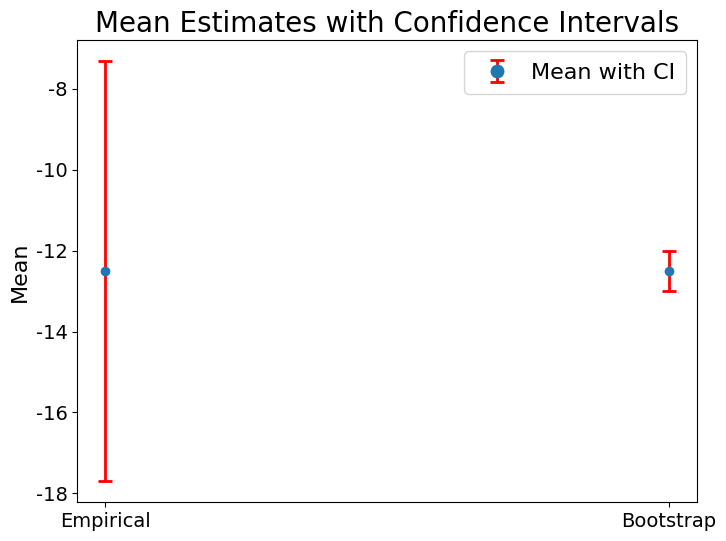

In [17]:
# Plot results
# Your code here
means = [mean_full, mean_full_b]
ci_lower_bounds = [mean_lower_full, mean_lower_full_b]
ci_upper_bounds = [mean_upper_full, mean_upper_full_b]

# Calculating errors in a more compact way
errors = np.abs(np.array([ci_lower_bounds, ci_upper_bounds]) - np.array(means))

# Plotting, with a slight change in formatting for brevity and clarity
plt.figure(figsize=(8, 6))
plt.errorbar(x=['Empirical', 'Bootstrap'], y=means, yerr=errors, fmt='o', capsize=5, capthick=2, ecolor='red', elinewidth=2, label='Mean with CI')
plt.ylabel('Mean')
plt.title('Mean Estimates with Confidence Intervals')
plt.legend()
plt.show()

In [18]:
# Compare the empirical coverage of different confidence intervals
# Your code here
def calculate_coverage_and_intervals(size, trials=3000, confidence=0.95):
    coverage_count = 0
    intervals = []

    for _ in range(trials):
        sample = np.random.choice(sample_full, size=size, replace=True)
        mean = sample.mean()
        sem = stats.sem(sample, nan_policy='omit')
        ci = stats.t.interval(confidence=0.95, df=len(sample)-1, loc=mean, scale=sem)
        intervals.append(ci)
        if ci[0] <= np.mean(sample_full) <= ci[1]:
            coverage_count += 1

    empirical_coverage = coverage_count / trials
    return empirical_coverage, intervals

# Assuming 'sizes' is defined, for example: sizes = [10, 20, 50, 100]
empirical_results = [calculate_coverage_and_intervals(size) for size in sizes]

# Separating empirical coverages and confidence intervals
empirical_coverages, conf_intervals = zip(*empirical_results)

empirical_coverages


(0.9543333333333334, 0.956, 0.952, 0.946, 0.9493333333333334, 0.947)

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

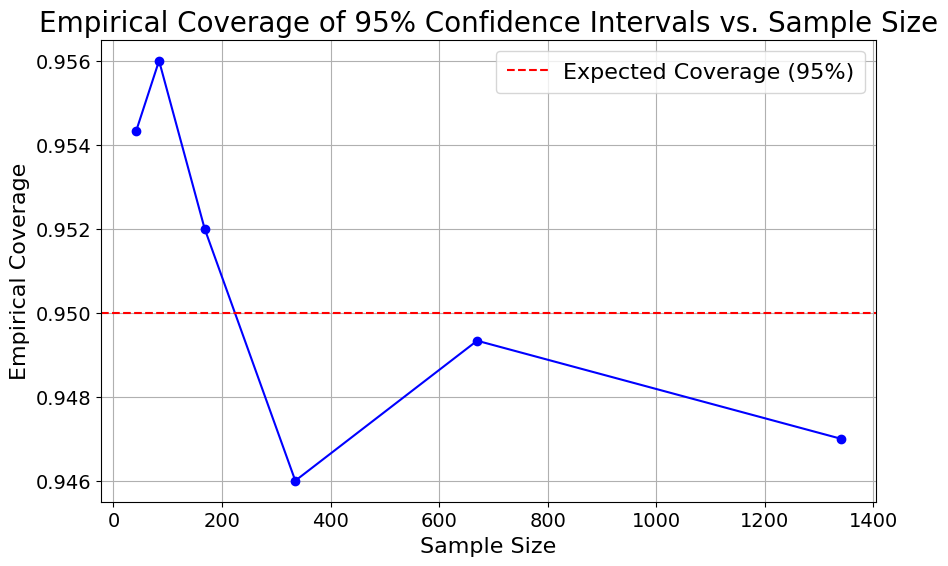

In [19]:
# Plot results
# Your code here

plt.figure(figsize=(10, 6))
plt.plot(sizes, empirical_coverages, marker='o', linestyle='-', color='blue')
plt.title('Empirical Coverage of 95% Confidence Intervals vs. Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Empirical Coverage')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='Expected Coverage (95%)')
plt.legend()
plt.show()

Your conclusion:

# Task 2. Currency in RC-circuit. (25 points)

In this part you need to estimate parameters and apply delta method and bootstrap. 

First of all, you need some libraries. Also, fix random seed to get reproducible results.

In [20]:
import numpy as np
from scipy.stats import norm, uniform
from numpy.random import choice, seed

seed(100)

## Part 1. Estimate parameters. (4 points)

Assume that there is an RC-circuit with a capacitor and a resistor. 
<img src="circuit.png" width="200"  class="center">

We charge the capacitor until it reaches voltage $V$ and measure current intensity. In this case voltage on the capacitor yields the formula for exponential decay:

$$ V_C(t) = V e^{-\frac{t}{RC}} $$

Let's assume that voltage $V$ and resistence $R$ are independent and belong to the following distributions:

### a) 
$V \sim N(5, 1)$, 

$R \sim \text{Uniform}(5, 10)$

### b) 
$V \sim N(15, 3)$, 

$R \sim \text{Exp}(0.1)$

Consider **true values** for $V$ and $R$ to be the means of the corresponding distributions.

Generate sample for $V$ of size 100. Apply maximum likelihood to estimate the mean. Show theoretical calculations for the estimates (with intermediate steps) and make simulation.

considering the likelihood function L for a normal distribution, given by:
$$L(\mu, \sigma^2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(V_i - \mu)^2}{2\sigma^2}\right)$$
where V_i represents each observation in the dataset, 
μ is the mean, and σ is the variance.

The log-likelihood function, denoted as l, transforms the product into a sum for easier computation:
$$\ell(\mu, \sigma^2) = \sum_{i=1}^{n} \left[ -\frac{1}{2} \log(2\pi\sigma^2) -\frac{(V_i - \mu)^2}{2\sigma^2} \right]$$
To find the MLE of μ, we differentiate l with respect to μ and equate to zero:
$$\frac{d\ell}{d\mu} = \sum_{i=1}^{n} \frac{V_i - \mu}{\sigma^2}$$

Setting this derivative equal to zero, we obtain:
$$\sum_{i=1}^{n} V_i - n\mu = 0$$
Solving for μ provides us the MLE of the mean:
$$\hat{\mu}_{MLE} = \frac{1}{n} \sum_{i=1}^{n} V_i = \bar{V}$$
Thus,
$$\hat{V}_{n} = \frac{1}{n} \sum_{i=1}^{n} V_i$$

In [21]:
# Your code here
V_samples = np.random.normal(loc=5, scale=1, size=100)
V_estimate = np.mean(V_samples)
V_estimate
# For theorical calculations, maximum likelihood estimate of the mean is the sample mean, because global minial 
# of second-order derivative of the log likelihood function is the sample mean

4.895834146155935

Generate sample for $R$ on size 100. Apply maximum likelihood to estimate the mean. Show theoretical calculations for estimates (with intermediate steps) and make simulation.

Uniform distribution has density function:
$$ f(x|a,b) = \frac{1}{b-a}, \quad \text{for } a \leq x \leq b $$
And likelihood function:
$$ L(a, b) = \prod_{i=1}^{n} \frac{1}{b-a} = \left(\frac{1}{b-a}\right)^n $$
Thus
$$ \hat{\mu} = \frac{a + b}{2} $$

$$ \hat{R}_{n} = \frac{a + b}{2}$$
Import a = 5, b = 10, we get
$$ \hat{R}_{n} = 7.5$$


In [22]:
# Your code here
R_samples = np.random.uniform(low=5, high=10, size=100)
a_estimate = np.min(R_samples)
b_estimate = np.max(R_samples)
R_estimate = (b_estimate + a_estimate) / 2
R_estimate
# For uniform distribution, it's important to note that MLE directly estimates the parameters of 
# the distribution (a and b in this case) rather than the mean itself.

7.563692275442884

## Part 2. Apply delta method. (8 points)

Assume, that we measure current intensity at $t=1$ second. Let's take $C = 1$. In this case we get the following simplified formula:

$$ I = \frac{V}{R} e^{-\frac{1}{R}} $$

Find estimate for current and it's confidence interval. Show theoretical calculations for estimates (with intermediate steps) and make simulation.

$$\hat{I}_n = \frac{\hat{V}_n}{\hat{R}_n} e^{-\frac{1}{\hat{R}_n}}$$

$$CI(\hat{I}_n) = \hat{I}_n \pm z \sqrt{\text{Var}(\hat{I}_n)}$$


In [23]:
# Your code here
import numpy as np

mu_V_a = 5
sigma_V_a = 1
mu_R_a = 7.5  # Mean of Uniform(5, 10)
sigma_R_a_squared = ((10 - 5) ** 2) / 12

def calculate_gradients(V, R):

    partial_g_V = (1 / R) * np.exp(-1 / R)
    partial_g_R = -(V / R ** 2) * (1 + 1 / R) * np.exp(-1 / R)
    return partial_g_V, partial_g_R

def calculate_variance(grad_V, grad_R, sigma_V_squared, sigma_R_squared):

    return (grad_V ** 2) * sigma_V_squared + (grad_R ** 2) * sigma_R_squared

def calculate_confidence_interval(I_hat, variance, z_score=1.96):

    margin = z_score * np.sqrt(variance)
    return I_hat - margin, I_hat + margin

# Perform calculations for scenario a
grad_V_a, grad_R_a = calculate_gradients(mu_V_a, mu_R_a)
var_I_a = calculate_variance(grad_V_a, grad_R_a, sigma_V_a ** 2, sigma_R_a_squared)
I_hat_n_a = (mu_V_a / mu_R_a) * np.exp(-1 / mu_R_a)
CI_lower_a, CI_upper_a = calculate_confidence_interval(I_hat_n_a, var_I_a)

# Outputs
print(f"A: I hat is {I_hat_n_a}, confidence interval is [{CI_lower_a}, {CI_upper_a}]")

# f"SE for delta method: {se}"

A: I hat is 0.583448879361965, confidence interval is [0.24504015068925017, 0.9218576080346799]


## Part 3. Bootstrap estimation. (2 points)

Estimate confidence interval for $I$ using bootstrap.

In [26]:
import numpy as np

def calculate_confidence_interval(value_data, rate_data, num_simulations=10000):
    data_length = len(value_data)
    simulation_results = np.zeros(num_simulations)
    for simulation_index in range(num_simulations):

        random_indices = np.random.choice(data_length, data_length, replace=True)
        resampled_values = value_data[random_indices]
        resampled_rates = rate_data[random_indices]

        metric = resampled_values / resampled_rates * np.exp(-1 / resampled_rates)
        simulation_results[simulation_index] = metric.mean()

    lower_bound = np.percentile(simulation_results, 2.5)
    upper_bound = np.percentile(simulation_results, 97.5)
    return lower_bound, upper_bound


value_samples = np.random.normal(5, 1, 10000)
rate_samples = np.random.uniform(5, 10, 10000)


lower_bound, upper_bound = calculate_confidence_interval(value_samples, rate_samples)

print(f"Confidence interval: [{lower_bound}, {upper_bound}]")


Confidence interval: [0.5980438890446184, 0.6041815611617295]


## Part 4. Compare results. (8 points)

Compare the size of confidence intervals obtained using delta method and bootstrap. Additionally, compare the empirical coverage of different confidence intervals (by generating sufficient number of samples of corresponding size and calculating proportion of cases when the interval covers the true value for the current $I$). Consider sizes `[1e1, ..., 1e4]`. Plot results and make conclusions based on obtained results.

In [ ]:
sizes = np.logspace(1, 4, 4).astype(np.int)

In [28]:
# Compare size of confidence intervals obtained using delta method and bootstrap
# Your code here
delta_method_intervals = []
bootstrap_method_intervals = []


true_metric = (5 / 7.5) * np.exp(-1 / 7.5)

def estimate_delta_CI(sample_size):
    value_samples = np.random.normal(5, 1, sample_size)
    rate_samples = np.random.uniform(5, 10, sample_size)
    metric_samples = value_samples / rate_samples * np.exp(-1 / rate_samples)
    mean_metric = np.mean(metric_samples)
    variance_metric = np.var(metric_samples) / sample_size  # Adjusted sample variance
    lower_bound = mean_metric - 1.96 * np.sqrt(variance_metric)
    upper_bound = mean_metric + 1.96 * np.sqrt(variance_metric)
    interval_size = upper_bound - lower_bound
    return lower_bound, upper_bound, interval_size

def estimate_bootstrap_CI(values, rates, num_bootstraps=1000):
    sample_size = len(values)
    bootstrap_results = np.zeros(num_bootstraps)
    for bootstrap_index in range(num_bootstraps):
        sample_indices = np.random.randint(0, sample_size, sample_size)
        sampled_values = values[sample_indices]
        sampled_rates = rates[sample_indices]
        sampled_metric = sampled_values / sampled_rates * np.exp(-1 / sampled_rates)
        bootstrap_results[bootstrap_index] = np.mean(sampled_metric)
    lower_bound = np.percentile(bootstrap_results, 2.5)
    upper_bound = np.percentile(bootstrap_results, 97.5)
    interval_size = upper_bound - lower_bound
    return lower_bound, upper_bound, interval_size

sizes = [100, 500, 1000, 5000, 10000]  # Assuming 'sizes' is defined somewhere
for size in sizes:
    _, _, delta_size = estimate_delta_CI(size)
    delta_method_intervals.append(delta_size)
    values, rates = np.random.normal(5, 1, size), np.random.uniform(5, 10, size)
    _, _, bootstrap_size = estimate_bootstrap_CI(values, rates)
    bootstrap_method_intervals.append(bootstrap_size)
    
bootstrap_method_intervals


[0.06663093107660589,
 0.025779736242450335,
 0.01984292786873032,
 0.008722957855745506,
 0.006258626215097762]

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

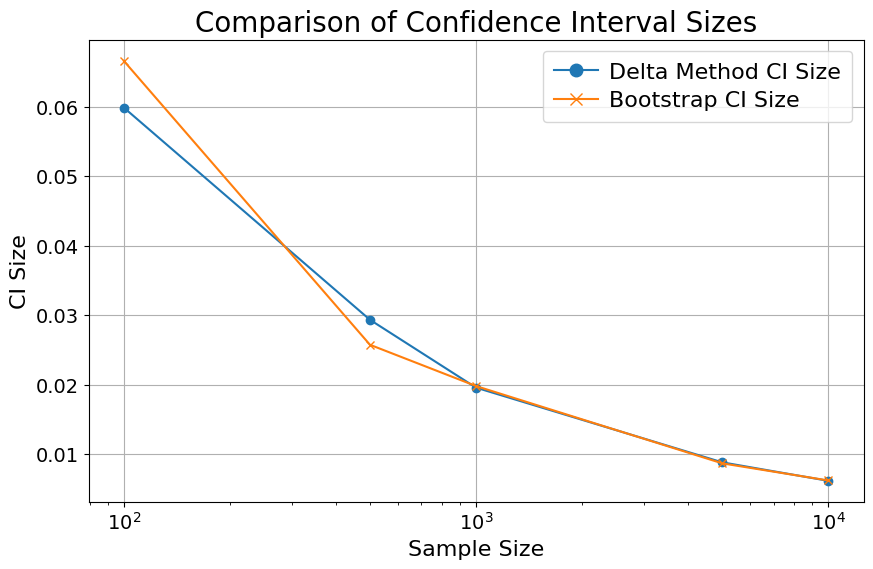

In [29]:
# Plot results
# Your code here
plt.figure(figsize=(10, 6))
plt.plot(sizes, delta_method_intervals, label='Delta Method CI Size', marker='o')
plt.plot(sizes, bootstrap_method_intervals, label='Bootstrap CI Size', marker='x')
plt.xscale('log')
plt.xlabel('Sample Size')
plt.ylabel('CI Size')
plt.title('Comparison of Confidence Interval Sizes')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# Compare an empirical coverage of different confidence intervals
# Your code here

delta_coverage = [0 for size in sizes]
bootstrap_coverage = [0 for size in sizes]
# **Written in previous block.
suffi_number = 100
for (index, size) in enumerate(sizes):
    for i in range(suffi_number):
        V_samples = np.random.normal(5, 1, size)
        R_samples = np.random.uniform(5, 10, size)
        CI_lower_delta, CI_upper_delta, size_delta = estimate_delta_CI(size)
        delta_coverage[index] += 1 if CI_lower_delta <= true_metric <= CI_upper_delta else 0
    
        CI_lower_bootstrap, CI_upper_bootstrap, size_bootstrap = estimate_bootstrap_CI(V_samples, R_samples)
        bootstrap_coverage[index] += 1 if CI_lower_bootstrap <= true_metric <= CI_upper_bootstrap else 0
    delta_coverage[index] /= suffi_number
    bootstrap_coverage[index] /= suffi_number

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

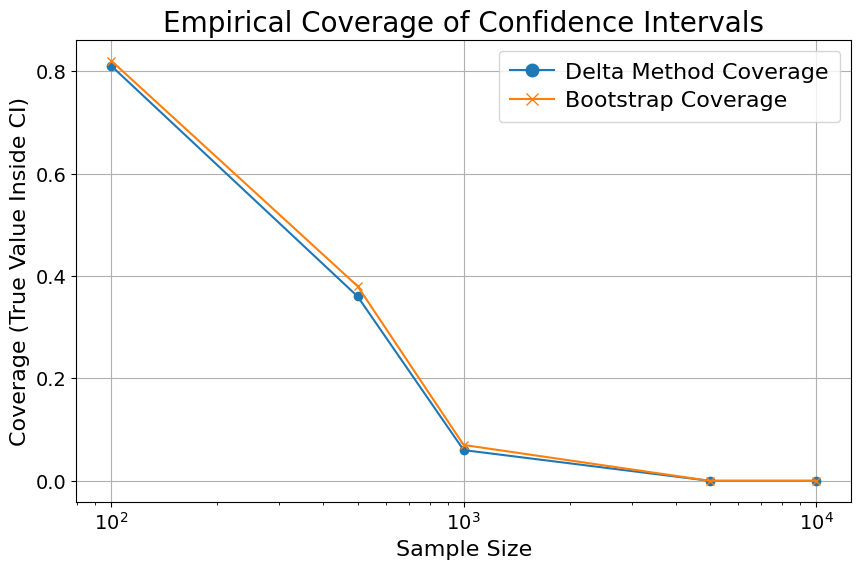

In [32]:
# Plot results
# Your code here

# Plot results
# Your code here
# Plot empirical coverage
plt.figure(figsize=(10, 6))
plt.plot(sizes, delta_coverage, label='Delta Method Coverage', marker='o')
plt.plot(sizes, bootstrap_coverage, label='Bootstrap Coverage', marker='x')
plt.xscale('log')
plt.xlabel('Sample Size')
plt.ylabel('Coverage (True Value Inside CI)')
plt.title('Empirical Coverage of Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()

Your conclusion:

The precision of our estimate for 

The precision of our estimate for **I** improves as the sample size grows, evidenced by the shrinking confidence interval (CI) sizes. This improvement in precision is a result of increased sample size leading to reduced variability in the estimate. The method of CI calculation—whether delta or bootstrap—impacts the trend of CI sizes differently. The bootstrap method's non-parametric nature allows for CI sizes that potentially adapt better to the data, reflecting differences in underlying distributions and sample sizes more accurately.

Conversely, a notable trend is the decline in empirical coverage with an increase in sample size. This decline is attributed to the confidence intervals becoming narrower as sample sizes expand. While this narrowing enhances precision, it may concurrently lower the likelihood of the intervals encompassing the true value of 
**I**, thereby affecting coverage.